In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\data\heart.csv"
df = pd.read_csv(path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# **Data exploraty**

In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# **Check for null values**

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Check for duplicates**

In [8]:
df.duplicated().sum()

np.int64(723)

Before dropping duplicates:
 target
1    526
0    499
Name: count, dtype: int64


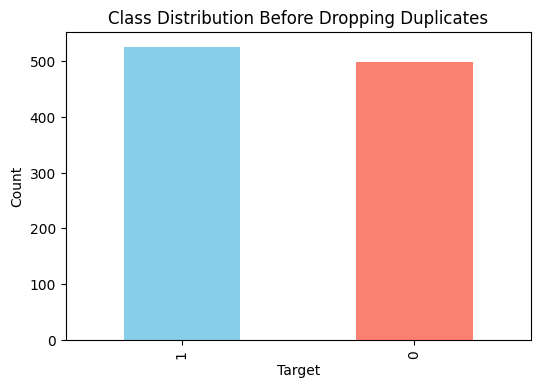

In [9]:
# Original class distribution
class_counts_before = df['target'].value_counts()
print("Before dropping duplicates:\n", class_counts_before)

# Plot
plt.figure(figsize=(6,4))
class_counts_before.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution Before Dropping Duplicates")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [10]:
#Since the data are balanced , we go to check for overfitting and data leakage
#Start with overfitting:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df.drop(columns='target')  # features
y = df['target']               # labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
print("Train acc:", accuracy_score(y_train, model.predict(X_train)))
print("Test acc:", accuracy_score(y_test, model.predict(X_test)))


Train acc: 0.8609756097560975
Test acc: 0.7853658536585366


C:\Users\bbuser\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [12]:
#Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [13]:
#Standardization (Z-score)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [14]:
#One-Hot Encoding (for categorical features)
X_train_enc = pd.get_dummies(X_train, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
X_test_enc = pd.get_dummies(X_test, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [15]:
#Build Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(input_dim, learning_rate=0.01):
    model = Sequential([
        Dense(32, input_dim=input_dim, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall'])
    return model

In [16]:
#Train Models
model_std = build_model(X_train_std.shape[1], learning_rate=0.01)
history_std = model_std.fit(
    X_train_std, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=16,
    verbose=1
)

C:\Users\bbuser\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - Precision: 0.8148 - Recall: 0.8487 - accuracy: 0.8232 - loss: 0.4038 - val_Precision: 0.8605 - val_Recall: 0.8605 - val_accuracy: 0.8537 - val_loss: 0.4171
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Precision: 0.8873 - Recall: 0.9347 - accuracy: 0.9055 - loss: 0.2469 - val_Precision: 0.8478 - val_Recall: 0.9070 - val_accuracy: 0.8659 - val_loss: 0.3588
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - Precision: 0.8966 - Recall: 0.9525 - accuracy: 0.9192 - loss: 0.2039 - val_Precision: 0.8125 - val_Recall: 0.9070 - val_accuracy: 0.8415 - val_loss: 0.3449
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - Precision: 0.9070 - Recall: 0.9555 - accuracy: 0.9268 - loss: 0.1708 - val_Precision: 0.8478 - val_Recall: 0.9070 - val_accuracy: 0.8659 - val_loss: 0.3212
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - Precision: 0.9233 - Recall: 0.9644 - accuracy: 0.9405 - loss: 0.1499 - val_Precision: 0.8696 - val_Recall: 0.93

In [17]:
#Evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred_std = (model_std.predict(X_test_std) > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_std))
print("Precision:", precision_score(y_test, y_pred_std))
print("Recall:", recall_score(y_test, y_pred_std))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 0.9707317073170731
Precision: 0.970873786407767
Recall: 0.970873786407767
